In [ ]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = 'brain-tumor.zip'
extraction_dir = 'brain-tumor-extracted'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extraction_dir)

print(f"Successfully extracted {zip_file_path} to {extraction_dir}")

Successfully extracted brain-tumor.zip to brain-tumor-extracted


In [ ]:
import os

def match_images_with_labels(image_dir, label_dir, image_extensions={'.jpg', '.jpeg', '.png'}):
    matched, unmatched_images, unmatched_labels = [], [], []

    image_files = [f for f in os.listdir(image_dir) if os.path.splitext(f)[1].lower() in image_extensions]
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

    image_basenames = {os.path.splitext(f)[0]: f for f in image_files}
    label_basenames = {os.path.splitext(f)[0]: f for f in label_files}

    # Matching
    for basename, img_file in image_basenames.items():
        if basename in label_basenames:
            matched.append((img_file, label_basenames[basename]))
        else:
            unmatched_images.append(img_file)

    for basename, lbl_file in label_basenames.items():
        if basename not in image_basenames:
            unmatched_labels.append(lbl_file)

    return matched, unmatched_images, unmatched_labels

# Paths
train_images_dir = '/content/brain-tumor-extracted/images/train'
train_labels_dir = '/content/brain-tumor-extracted/labels/train'

val_images_dir = '/content/brain-tumor-extracted/images/val'
val_labels_dir = '/content/brain-tumor-extracted/labels/val'

# Match for training set
matched_train, unmatched_imgs_train, unmatched_lbls_train = match_images_with_labels(train_images_dir, train_labels_dir)

# Match for validation set
matched_val, unmatched_imgs_val, unmatched_lbls_val = match_images_with_labels(val_images_dir, val_labels_dir)

print(f"[TRAIN] Matched: {len(matched_train)}, Unmatched Images: {len(unmatched_imgs_train)}, Unmatched Labels: {len(unmatched_lbls_train)}")
print(f"[VAL] Matched: {len(matched_val)}, Unmatched Images: {len(unmatched_imgs_val)}, Unmatched Labels: {len(unmatched_lbls_val)}")

# If you want to print unmatched files for debugging:
if unmatched_imgs_train or unmatched_lbls_train:
    print("[TRAIN] Unmatched Images:", unmatched_imgs_train)
    print("[TRAIN] Unmatched Labels:", unmatched_lbls_train)

if unmatched_imgs_val or unmatched_lbls_val:
    print("[VAL] Unmatched Images:", unmatched_imgs_val)
    print("[VAL] Unmatched Labels:", unmatched_lbls_val)


[TRAIN] Matched: 874, Unmatched Images: 15, Unmatched Labels: 4
[VAL] Matched: 223, Unmatched Images: 0, Unmatched Labels: 0
[TRAIN] Unmatched Images: ['00364_127.jpg', '00360_114.jpg', '00360_120.jpg', '00360_129.jpg', '00360_122.jpg', '00360_126.jpg', '00364_113.jpg', '00364_119.jpg', '00364_120.jpg', '72 (12).jpg', '00360_115.jpg', '00360_108.jpg', '00364_107.jpg', '00406_98.jpg', '00364_125.jpg']
[TRAIN] Unmatched Labels: ['00054_145.txt', '00056_129.txt', '00056_110.txt', '00054_164.txt']


In [ ]:
import os

def match_images_with_labels(image_dir, label_dir, image_extensions={'.jpg', '.jpeg', '.png'}):
    matched, unmatched_images, unmatched_labels = [], [], []

    # Recursively collect all image files
    image_files = []
    for root, _, files in os.walk(image_dir):
        for f in files:
            if os.path.splitext(f)[1].lower() in image_extensions:
                rel_path = os.path.relpath(os.path.join(root, f), image_dir)
                image_files.append(rel_path)

    # Recursively collect all label files
    label_files = []
    for root, _, files in os.walk(label_dir):
        for f in files:
            if f.endswith('.txt'):
                rel_path = os.path.relpath(os.path.join(root, f), label_dir)
                label_files.append(rel_path)

    # Prepare basenames for matching
    image_basenames = {os.path.splitext(f)[0]: f for f in image_files}
    label_basenames = {os.path.splitext(f)[0]: f for f in label_files}

    # Matching
    for basename, img_file in image_basenames.items():
        if basename in label_basenames:
            matched.append((img_file, label_basenames[basename]))
        else:
            unmatched_images.append(img_file)

    for basename, lbl_file in label_basenames.items():
        if basename not in image_basenames:
            unmatched_labels.append(lbl_file)

    return matched, unmatched_images, unmatched_labels

# Paths
train_images_dir = '/content/brain-tumor-extracted/images/train'
train_labels_dir = '/content/brain-tumor-extracted/labels/train'

val_images_dir = '/content/brain-tumor-extracted/images/val'
val_labels_dir = '/content/brain-tumor-extracted/labels/val'

# Match for training set
matched_train, unmatched_imgs_train, unmatched_lbls_train = match_images_with_labels(train_images_dir, train_labels_dir)

# Match for validation set
matched_val, unmatched_imgs_val, unmatched_lbls_val = match_images_with_labels(val_images_dir, val_labels_dir)

# Reporting
print("="*50)
print(f"[TRAIN] Matched Pairs: {len(matched_train)}")
print(f"[TRAIN] Unmatched Images: {len(unmatched_imgs_train)}")
print(f"[TRAIN] Unmatched Labels: {len(unmatched_lbls_train)}")
if unmatched_imgs_train:
    print("[TRAIN] Unmatched Images List:")
    for img in unmatched_imgs_train:
        print(" -", img)
if unmatched_lbls_train:
    print("[TRAIN] Unmatched Labels List:")
    for lbl in unmatched_lbls_train:
        print(" -", lbl)

print("="*50)
print(f"[VAL] Matched Pairs: {len(matched_val)}")
print(f"[VAL] Unmatched Images: {len(unmatched_imgs_val)}")
print(f"[VAL] Unmatched Labels: {len(unmatched_lbls_val)}")
if unmatched_imgs_val:
    print("[VAL] Unmatched Images List:")
    for img in unmatched_imgs_val:
        print(" -", img)
if unmatched_lbls_val:
    print("[VAL] Unmatched Labels List:")
    for lbl in unmatched_lbls_val:
        print(" -", lbl)
print("="*50)


[TRAIN] Matched Pairs: 874
[TRAIN] Unmatched Images: 15
[TRAIN] Unmatched Labels: 4
[TRAIN] Unmatched Images List:
 - 00364_127.jpg
 - 00360_114.jpg
 - 00360_120.jpg
 - 00360_129.jpg
 - 00360_122.jpg
 - 00360_126.jpg
 - 00364_113.jpg
 - 00364_119.jpg
 - 00364_120.jpg
 - 72 (12).jpg
 - 00360_115.jpg
 - 00360_108.jpg
 - 00364_107.jpg
 - 00406_98.jpg
 - 00364_125.jpg
[TRAIN] Unmatched Labels List:
 - 00054_145.txt
 - 00056_129.txt
 - 00056_110.txt
 - 00054_164.txt
[VAL] Matched Pairs: 223
[VAL] Unmatched Images: 0
[VAL] Unmatched Labels: 0


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

def match_images_with_labels(image_dir, label_dir, image_extensions={'.jpg', '.jpeg', '.png'}):
    matched = []

    image_files = []
    for root, _, files in os.walk(image_dir):
        for f in files:
            if os.path.splitext(f)[1].lower() in image_extensions:
                rel_path = os.path.relpath(os.path.join(root, f), image_dir)
                image_files.append(rel_path)

    label_files = []
    for root, _, files in os.walk(label_dir):
        for f in files:
            if f.endswith('.txt'):
                rel_path = os.path.relpath(os.path.join(root, f), label_dir)
                label_files.append(rel_path)

    image_basenames = {os.path.splitext(f)[0]: f for f in image_files}
    label_basenames = {os.path.splitext(f)[0]: f for f in label_files}

    for basename, img_file in image_basenames.items():
        if basename in label_basenames:
            matched.append((img_file, label_basenames[basename]))

    return matched

def plot_image_with_labels(image_path, label_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue  # skip invalid labels

        cls, x_center, y_center, bbox_w, bbox_h = map(float, parts)

        x_center *= w
        y_center *= h
        bbox_w *= w
        bbox_h *= h

        x1 = int(x_center - bbox_w / 2)
        y1 = int(y_center - bbox_h / 2)
        x2 = int(x_center + bbox_w / 2)
        y2 = int(y_center + bbox_h / 2)

        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f'Class {int(cls)}', (x1, max(y1 - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Paths
train_images_dir = '/content/brain-tumor-extracted/images/train'
train_labels_dir = '/content/brain-tumor-extracted/labels/train'

val_images_dir = '/content/brain-tumor-extracted/images/val'
val_labels_dir = '/content/brain-tumor-extracted/labels/val'



# Match images and labels
matched_train = match_images_with_labels(train_images_dir, train_labels_dir)
matched_val = match_images_with_labels(val_images_dir, val_labels_dir)


Displaying: 00328_100.jpg with 00328_100.txt


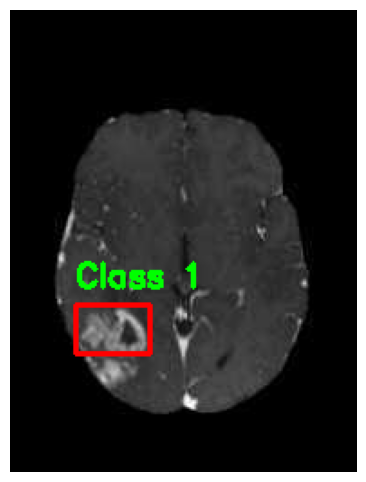

Displaying: 72.jpg with 72.txt


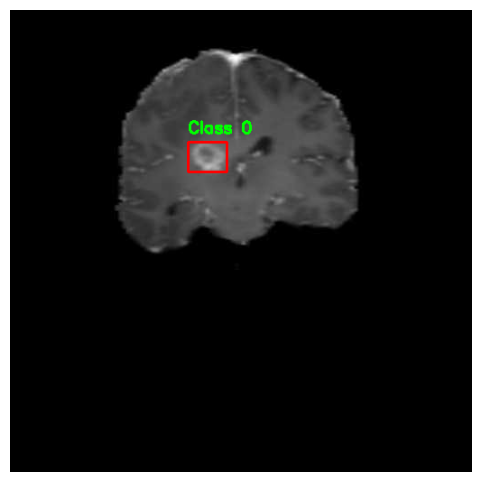

Displaying: 00317_24.jpg with 00317_24.txt


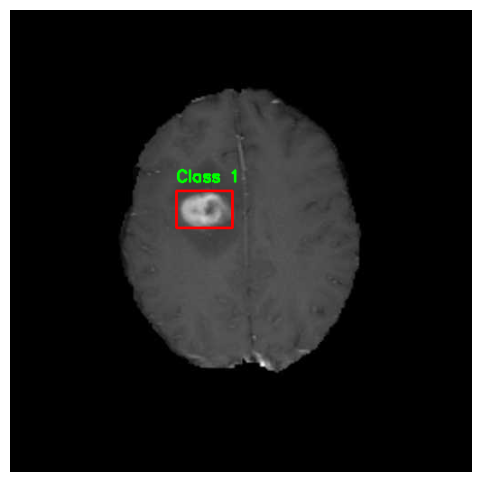

Displaying: 00169_142.jpg with 00169_142.txt


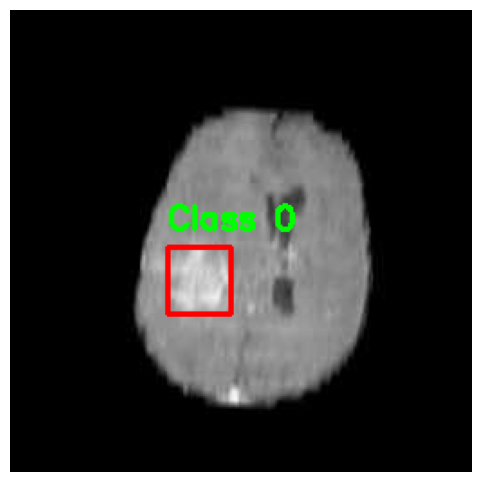

Displaying: 00138_217.jpg with 00138_217.txt


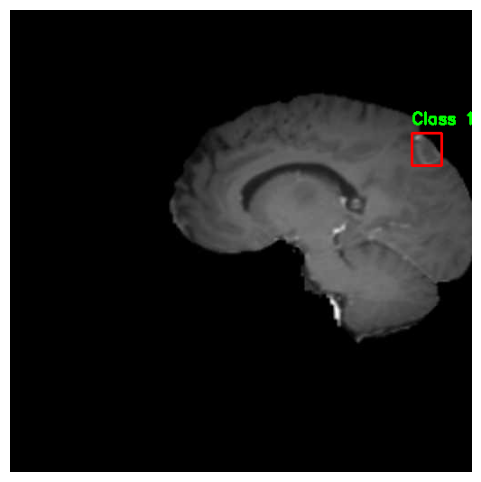

In [ ]:

# Visualize 5 random samples from training set
num_samples = 5
samples = random.sample(matched_train, min(num_samples, len(matched_train)))

for img_rel_path, lbl_rel_path in samples:
    img_full_path = os.path.join(train_images_dir, img_rel_path)
    lbl_full_path = os.path.join(train_labels_dir, lbl_rel_path)
    print(f"Displaying: {img_rel_path} with {lbl_rel_path}")
    plot_image_with_labels(img_full_path, lbl_full_path)


In [ ]:
print(f"Number of images with labels in the training set: {len(matched_train)}")
print(f"Number of images with labels in the validation set: {len(matched_val)}")


Number of images with labels in the training set: 874
Number of images with labels in the validation set: 223


In [ ]:
import os
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random

class TumorDetectionDataset(Dataset):
    def __init__(self, images_dir, labels_dir, image_size=640, transforms=None, image_extensions={'.jpg', '.jpeg', '.png'}):
        self.image_paths = []
        self.label_paths = []
        self.image_size = image_size
        self.transforms = transforms

        # Matching images and labels
        image_files = []
        for root, _, files in os.walk(images_dir):
            for f in files:
                if os.path.splitext(f)[1].lower() in image_extensions:
                    rel_path = os.path.relpath(os.path.join(root, f), images_dir)
                    image_files.append(rel_path)

        label_files = []
        for root, _, files in os.walk(labels_dir):
            for f in files:
                if f.endswith('.txt'):
                    rel_path = os.path.relpath(os.path.join(root, f), labels_dir)
                    label_files.append(rel_path)

        image_basenames = {os.path.splitext(f)[0]: f for f in image_files}
        label_basenames = {os.path.splitext(f)[0]: f for f in label_files}

        for basename, img_file in image_basenames.items():
            if basename in label_basenames:
                self.image_paths.append(os.path.join(images_dir, img_file))
                self.label_paths.append(os.path.join(labels_dir, label_basenames[basename]))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        lbl_path = self.label_paths[idx]

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {img_path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.image_size, self.image_size))

        img_tensor = torch.from_numpy(img).float().permute(2, 0, 1) / 255.0  # CxHxW, normalized to [0,1]

        # Load labels
        labels = []
        with open(lbl_path, 'r') as f:
            lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            labels.append([float(p) for p in parts])
        labels = torch.tensor(labels, dtype=torch.float32)

        # Apply transforms if any
        if self.transforms:
            img_tensor, labels = self.transforms(img_tensor, labels)

        return img_tensor, labels

# Example usage:
if __name__ == '__main__':
    train_dataset = TumorDetectionDataset(
        images_dir='/content/brain-tumor-extracted/images/train',
        labels_dir='/content/brain-tumor-extracted/labels/train',
        image_size=640
    )

    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

    print(f"Total training samples: {len(train_dataset)}")

    # Example iteration to visualize shapes
    for images, labels in train_loader:
        print(f"Batch size: {len(images)}")
        print(f"Image shape: {images[0].shape}")  # e.g., torch.Size([3, 640, 640])
        print(f"Labels shape: {labels[0].shape}")  # e.g., torch.Size([N, 5])
        break

Total training samples: 874
Batch size: 4
Image shape: torch.Size([3, 640, 640])
Labels shape: torch.Size([1, 5])


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data='/content/brain-tumor-extracted/brain-tumor.yaml',
            epochs=20,
            imgsz=640,
            batch=8)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/brain-tumor-extracted/brain-tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

train: Scanning /content/datasets/brain-tumor/labels/train.cache... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 66.0±26.3 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/labels/val.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.18G      1.382      3.361      1.214          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.36it/s]

                   all        223        241      0.512      0.264      0.411      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.45G      1.226      2.314      1.141         14        640: 100%|██████████| 112/112 [00:17<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.58it/s]

                   all        223        241      0.396      0.718      0.401      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      1.45G      1.245       1.99      1.167          7        640: 100%|██████████| 112/112 [00:18<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.42it/s]

                   all        223        241      0.423      0.744      0.449      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.45G      1.232      1.778      1.152          7        640: 100%|██████████| 112/112 [00:16<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.49it/s]

                   all        223        241      0.447      0.635      0.452      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.45G        1.2      1.616      1.139          6        640: 100%|██████████| 112/112 [00:19<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.60it/s]

                   all        223        241      0.444      0.774      0.453       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.45G      1.172      1.503      1.134          6        640: 100%|██████████| 112/112 [00:17<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.19it/s]

                   all        223        241      0.419      0.811      0.462      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.45G      1.125      1.418      1.093          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.80it/s]

                   all        223        241      0.433      0.806      0.474      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.45G      1.119      1.342      1.095          9        640: 100%|██████████| 112/112 [00:17<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.44it/s]

                   all        223        241      0.436      0.819      0.481      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.45G       1.13      1.368      1.124          9        640: 100%|██████████| 112/112 [00:18<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.69it/s]

                   all        223        241      0.463      0.791      0.485      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.45G      1.083      1.276      1.088          5        640: 100%|██████████| 112/112 [00:16<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.68it/s]

                   all        223        241      0.467      0.837      0.493      0.357


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.45G     0.9986      1.237      1.063          5        640: 100%|██████████| 112/112 [00:18<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.60it/s]

                   all        223        241      0.446      0.837       0.48      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.45G     0.9503      1.179      1.044          6        640: 100%|██████████| 112/112 [00:16<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  7.66it/s]

                   all        223        241      0.451      0.846      0.507      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.45G     0.9563      1.136      1.041          5        640: 100%|██████████| 112/112 [00:17<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.66it/s]

                   all        223        241      0.451      0.882      0.498      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.45G     0.9312      1.111      1.019          4        640: 100%|██████████| 112/112 [00:16<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.67it/s]

                   all        223        241       0.45      0.803       0.48      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.45G     0.9228      1.105      1.019          5        640: 100%|██████████| 112/112 [00:17<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.85it/s]

                   all        223        241      0.466      0.773      0.492      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.45G     0.8829      1.064      1.001          5        640: 100%|██████████| 112/112 [00:16<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.68it/s]

                   all        223        241      0.472      0.857      0.497      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.45G     0.8774      1.044      1.001          4        640: 100%|██████████| 112/112 [00:17<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.61it/s]

                   all        223        241      0.456      0.865      0.483      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.45G      0.856      1.034     0.9765          5        640: 100%|██████████| 112/112 [00:16<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.74it/s]

                   all        223        241      0.452      0.879      0.484      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.45G     0.8242      1.007     0.9812          7        640: 100%|██████████| 112/112 [00:16<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]

                   all        223        241      0.466       0.86      0.488      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.45G      0.818     0.9885     0.9574          6        640: 100%|██████████| 112/112 [00:16<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:01<00:00,  8.80it/s]

                   all        223        241      0.455      0.885      0.493      0.379



20 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]


                   all        223        241      0.455      0.885      0.494       0.38
              negative        142        154       0.57      0.836      0.604      0.469
              positive         81         87       0.34      0.934      0.384      0.291
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d07337bd2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 195.1±97.0 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/labels/val.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:02<00:00,  9.77it/s]


                   all        223        241      0.455      0.886      0.494       0.38
              negative        142        154       0.57      0.836      0.604      0.468
              positive         81         87       0.34      0.935      0.384      0.291
Speed: 1.3ms preprocess, 5.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train42
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d071ee48e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,   

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # or yolov8s.pt if your GPU can handle

model.train(
    data='/content/datasets/brain-tumor/brain-tumor.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    project='runs/detect',
    name='train43'   # NEW run, will create weights automatically
)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/brain-tumor/brain-tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train432, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

train: Scanning /content/datasets/brain-tumor/labels/train.cache... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 72.8±30.8 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/labels/val.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]


Plotting labels to runs/detect/train432/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train432
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.11G      1.397      3.446      1.246         20        640: 100%|██████████| 56/56 [00:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        223        241    0.00146      0.418     0.0706     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.57G      1.261      2.377      1.139         28        640: 100%|██████████| 56/56 [00:15<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]

                   all        223        241      0.178      0.157     0.0841     0.0485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.57G      1.247      2.066      1.163         20        640: 100%|██████████| 56/56 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        223        241      0.404      0.496      0.343      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.57G      1.196       1.79       1.13         19        640: 100%|██████████| 56/56 [00:15<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        223        241      0.425       0.69      0.453      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.57G      1.178      1.612      1.133         23        640: 100%|██████████| 56/56 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.437      0.737      0.475      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.57G      1.144      1.483      1.106         13        640: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]

                   all        223        241       0.44      0.826       0.51      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.57G      1.148      1.396      1.106         23        640: 100%|██████████| 56/56 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all        223        241      0.462      0.772       0.48       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.57G      1.125      1.345      1.091         23        640: 100%|██████████| 56/56 [00:14<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        223        241      0.458      0.814      0.462      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.59G      1.107      1.306      1.089         24        640: 100%|██████████| 56/56 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        223        241       0.46      0.795      0.485      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.59G      1.094      1.267      1.088         22        640: 100%|██████████| 56/56 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        223        241      0.474      0.809      0.484      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.59G      1.074      1.246      1.077         22        640: 100%|██████████| 56/56 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        223        241       0.46      0.783      0.481      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.59G      1.061      1.218      1.067         18        640: 100%|██████████| 56/56 [00:14<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.468       0.73      0.487      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.6G      1.046      1.179      1.052         15        640: 100%|██████████| 56/56 [00:14<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        223        241      0.472      0.823      0.506      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.61G      1.047      1.185      1.056         18        640: 100%|██████████| 56/56 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all        223        241      0.479      0.819      0.491      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.62G      1.051      1.168      1.059         24        640: 100%|██████████| 56/56 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        223        241      0.482      0.839       0.49      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.62G      1.023      1.162      1.044         11        640: 100%|██████████| 56/56 [00:14<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.64it/s]

                   all        223        241      0.457      0.784      0.484      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.64G      1.002      1.138      1.039         31        640: 100%|██████████| 56/56 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.449      0.838      0.478      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.64G      1.006       1.13      1.052         23        640: 100%|██████████| 56/56 [00:15<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        223        241      0.433      0.877      0.475       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.64G     0.9881      1.111      1.047         23        640: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241      0.447      0.821      0.464      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.64G     0.9993      1.117      1.027         19        640: 100%|██████████| 56/56 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        223        241      0.445      0.813      0.487       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.64G      1.015      1.118      1.057         15        640: 100%|██████████| 56/56 [00:14<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        223        241      0.453      0.846      0.497      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.64G     0.9675      1.089      1.028         25        640: 100%|██████████| 56/56 [00:14<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        223        241      0.449       0.82      0.479      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.64G     0.9858       1.07      1.035         18        640: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.53it/s]

                   all        223        241      0.448      0.855      0.465      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.64G     0.9414       1.04      1.015         20        640: 100%|██████████| 56/56 [00:14<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        223        241       0.41      0.878      0.445       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.64G     0.9717      1.059      1.036         20        640: 100%|██████████| 56/56 [00:14<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        223        241      0.442      0.794      0.453      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.64G     0.9402      1.054      1.012         21        640: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        223        241      0.413      0.812      0.429      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.64G     0.9676       1.04      1.022         19        640: 100%|██████████| 56/56 [00:14<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241      0.434      0.853      0.452      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.64G     0.9187      1.059      1.005         22        640: 100%|██████████| 56/56 [00:14<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        223        241      0.428      0.876       0.47       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.64G     0.9116     0.9836     0.9957         15        640: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all        223        241      0.452       0.83      0.458      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.64G     0.8788     0.9744     0.9951         24        640: 100%|██████████| 56/56 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.65it/s]

                   all        223        241      0.457      0.844      0.475      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.64G     0.9428     0.9878      1.013         21        640: 100%|██████████| 56/56 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        223        241      0.448      0.866       0.49      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.65G     0.8984     0.9532     0.9924         25        640: 100%|██████████| 56/56 [00:14<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        223        241      0.454      0.856      0.465       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.66G     0.9115      0.956     0.9991         25        640: 100%|██████████| 56/56 [00:14<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        223        241      0.424      0.866      0.459      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.67G     0.8884     0.9195      1.002         23        640: 100%|██████████| 56/56 [00:14<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]

                   all        223        241      0.432      0.889      0.449      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.67G     0.8825     0.9495     0.9957         29        640: 100%|██████████| 56/56 [00:15<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        223        241       0.44      0.882      0.469      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.67G      0.879     0.9274     0.9838         18        640: 100%|██████████| 56/56 [00:14<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all        223        241      0.406      0.884      0.427      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.67G     0.8835     0.8845     0.9807         20        640: 100%|██████████| 56/56 [00:14<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]

                   all        223        241      0.436      0.792      0.474      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G     0.8701     0.9035     0.9862         16        640: 100%|██████████| 56/56 [00:14<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        223        241      0.414      0.844      0.427      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.67G     0.8573     0.8652     0.9768         25        640: 100%|██████████| 56/56 [00:14<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        223        241      0.419      0.872      0.461      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.67G     0.8388      0.829     0.9694         22        640: 100%|██████████| 56/56 [00:14<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]

                   all        223        241      0.409      0.871      0.421       0.31


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.67G     0.8082     0.7869     0.9568         13        640: 100%|██████████| 56/56 [00:16<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]

                   all        223        241      0.437      0.885      0.455      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G     0.7735     0.7447     0.9464         12        640: 100%|██████████| 56/56 [00:14<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]

                   all        223        241      0.411      0.859      0.435      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.67G     0.7669     0.7366     0.9466         12        640: 100%|██████████| 56/56 [00:13<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]

                   all        223        241      0.407      0.858      0.442      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.67G     0.7566     0.7249     0.9396         13        640: 100%|██████████| 56/56 [00:14<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        223        241       0.44      0.884      0.473      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.67G      0.728     0.6861     0.9193         13        640: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.45it/s]

                   all        223        241      0.412       0.85      0.442      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.67G     0.7312     0.6614     0.9309         13        640: 100%|██████████| 56/56 [00:13<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all        223        241      0.463      0.841      0.511      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.67G     0.7324     0.6499     0.9294         12        640: 100%|██████████| 56/56 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        223        241       0.45      0.842      0.493      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.67G       0.72     0.6166     0.9239         15        640: 100%|██████████| 56/56 [00:14<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        223        241      0.437      0.723      0.454      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.67G     0.7192     0.6301     0.9253         14        640: 100%|██████████| 56/56 [00:14<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]

                   all        223        241      0.456       0.86      0.493      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.67G     0.7059     0.5937     0.9149         15        640: 100%|██████████| 56/56 [00:13<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]

                   all        223        241      0.457       0.81      0.479      0.351



50 epochs completed in 0.236 hours.
Optimizer stripped from runs/detect/train432/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train432/weights/best.pt, 6.2MB

Validating runs/detect/train432/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]


                   all        223        241      0.463      0.841      0.511      0.384
              negative        142        154      0.601       0.74      0.628      0.479
              positive         81         87      0.326      0.943      0.394      0.288
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train432


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d07337f48d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train432/weights/best.pt')  # update path if needed
metrics = model.val()  # evaluates on val set specified in your data.yaml
print(metrics)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 193.8±109.5 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/labels/val.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.74it/s]


                   all        223        241      0.463      0.841      0.511      0.383
              negative        142        154      0.601       0.74      0.628      0.479
              positive         81         87      0.325      0.943      0.394      0.288
Speed: 2.8ms preprocess, 5.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d074050d550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.

In [ ]:
results = model.predict(source='/content/datasets/brain-tumor/images/val', save=True, conf=0.25)

# Prints predictions for each image
for r in results:
    boxes = r.boxes
    print(f"Image: {r.path}")
    print(f"Boxes: {boxes.xyxy}")    # [x1, y1, x]()



image 1/223 /content/datasets/brain-tumor/images/val/val_1 (1).jpg: 640x640 1 positive, 15.6ms
image 2/223 /content/datasets/brain-tumor/images/val/val_1 (10).jpg: 640x640 1 negative, 1 positive, 7.4ms
image 3/223 /content/datasets/brain-tumor/images/val/val_1 (100).jpg: 640x640 3 positives, 7.3ms
image 4/223 /content/datasets/brain-tumor/images/val/val_1 (101).jpg: 640x640 1 positive, 7.4ms
image 5/223 /content/datasets/brain-tumor/images/val/val_1 (102).jpg: 640x640 1 positive, 7.4ms
image 6/223 /content/datasets/brain-tumor/images/val/val_1 (103).jpg: 640x640 1 negative, 1 positive, 7.6ms
image 7/223 /content/datasets/brain-tumor/images/val/val_1 (104).jpg: 640x640 1 positive, 10.2ms
image 8/223 /content/datasets/brain-tumor/images/val/val_1 (105).jpg: 640x640 1 positive, 12.0ms
image 9/223 /content/datasets/brain-tumor/images/val/val_1 (106).jpg: 640x640 1 positive, 12.7ms
image 10/223 /content/datasets/brain-tumor/images/val/val_1 (107).jpg: 640x640 1 negative, 1 positive, 12.4ms

[✅] Saved: plots/validation_metrics_vs_epochs.png


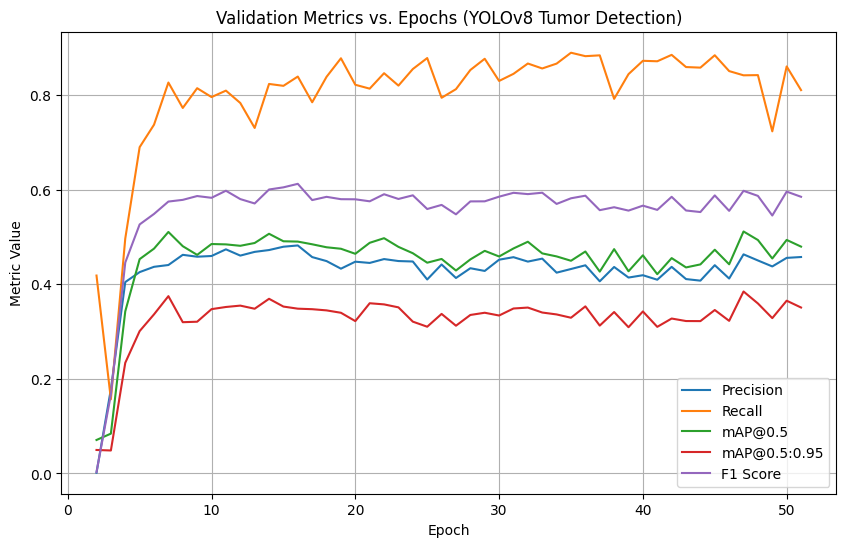

[✅] Saved: plots/training_loss_vs_epochs.png


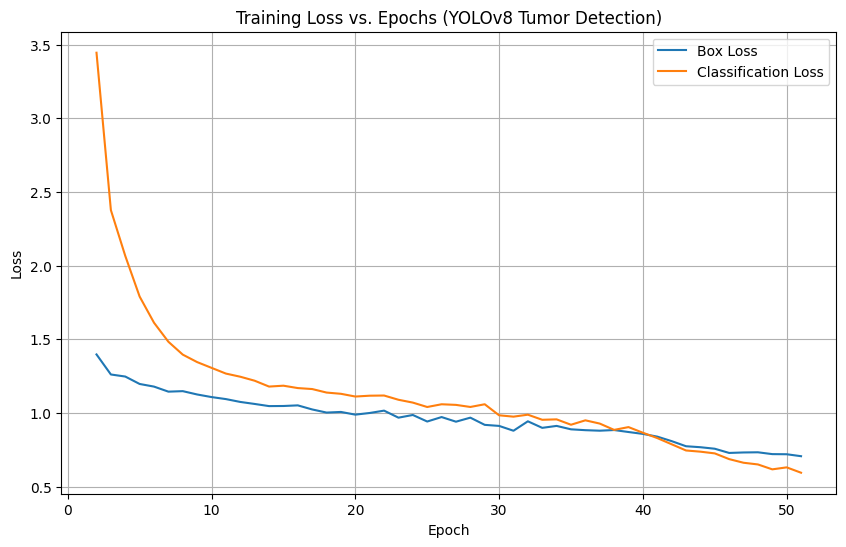

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ========== CONFIG ==========
csv_path = 'runs/detect/train432/results.csv'  # adjust path if needed
save_dir = 'plots'  # folder to save plots
os.makedirs(save_dir, exist_ok=True)
# =============================

# Load YOLOv8 metrics
df = pd.read_csv(csv_path)
epochs = df['epoch'] + 1

# ========== Plot 1: Validation Metrics ==========
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['metrics/precision(B)'], label='Precision')
plt.plot(epochs, df['metrics/recall(B)'], label='Recall')
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')

# Compute F1 = 2 * (P * R) / (P + R)
precision = df['metrics/precision(B)']
recall = df['metrics/recall(B)']
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
plt.plot(epochs, f1_score, label='F1 Score')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Validation Metrics vs. Epochs (YOLOv8 Tumor Detection)')
plt.legend()
plt.grid(True)
save_path = os.path.join(save_dir, 'validation_metrics_vs_epochs.png')
plt.savefig(save_path, dpi=300)
print(f"[✅] Saved: {save_path}")
plt.show()

# ========== Plot 2: Training Loss ==========
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['train/box_loss'], label='Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Classification Loss')

if 'train/obj_loss' in df.columns:
    plt.plot(epochs, df['train/obj_loss'], label='Objectness Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs (YOLOv8 Tumor Detection)')
plt.legend()
plt.grid(True)
save_path = os.path.join(save_dir, 'training_loss_vs_epochs.png')
plt.savefig(save_path, dpi=300)
print(f"[✅] Saved: {save_path}")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ========== CONFIG ==========
csv_path = 'runs/detect/train/results.csv'  # adjust path if needed
save_dir = 'plots'  # folder to save plots
os.makedirs(save_dir, exist_ok=True)
# =============================

# Load YOLOv8 metrics
df = pd.read_csv(csv_path)
epochs = df['epoch'] + 1

# ========== Plot 1: Validation Metrics ==========
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['metrics/precision'], label='Precision')
plt.plot(epochs, df['metrics/recall'], label='Recall')
plt.plot(epochs, df['metrics/mAP_0.5'], label='mAP@0.5')
plt.plot(epochs, df['metrics/mAP_0.5:0.95'], label='mAP@0.5:0.95')

# Compute F1 = 2 * (P * R) / (P + R)
precision = df['metrics/precision']
recall = df['metrics/recall']
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
plt.plot(epochs, f1_score, label='F1 Score')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Validation Metrics vs. Epochs (YOLOv8 Tumor Detection)')
plt.legend()
plt.grid(True)
save_path = os.path.join(save_dir, 'validation_metrics_vs_epochs.png')
plt.savefig(save_path, dpi=300)
print(f"[✅] Saved: {save_path}")
plt.show()

# ========== Plot 2: Training Loss ==========
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['train/box_loss'], label='Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Classification Loss')

if 'train/obj_loss' in df.columns:
    plt.plot(epochs, df['train/obj_loss'], label='Objectness Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs (YOLOv8 Tumor Detection)')
plt.legend()
plt.grid(True)
save_path = os.path.join(save_dir, 'training_loss_vs_epochs.png')
plt.savefig(save_path, dpi=300)
print(f"[✅] Saved: {save_path}")
plt.show()


In [ ]:
display(df.head())
print(df.columns)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,19.2857,1.39686,3.44561,1.24633,0.00146,0.41820,0.07065,0.04954,1.05791,3.37602,1.05484,0.000546,0.000546,0.000546
1,2,37.5741,1.26075,2.37689,1.13941,0.17800,0.15663,0.08408,0.04847,1.80001,3.92668,1.73280,0.001080,0.001080,0.001080
2,3,54.4197,1.24678,2.06611,1.16306,0.40439,0.49638,0.34253,0.23375,1.26161,2.28616,1.22376,0.001591,0.001591,0.001591
3,4,72.1445,1.19634,1.78979,1.12980,0.42547,0.68951,0.45286,0.30076,1.20422,1.50807,1.13212,0.001568,0.001568,0.001568
4,5,89.7059,1.17847,1.61214,1.13269,0.43666,0.73701,0.47510,0.33619,1.06460,1.37434,1.04428,0.001535,0.001535,0.001535


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [ ]:
pip install wandb

In [ ]:
! pip install markdown2
! pip install weasyprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 850.6/850.6 kB 60.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import markdown2
from weasyprint import HTML

# ========== CONFIG ==========
csv_path = 'runs/detect/train432/results.csv'  # path to YOLOv8 results.csv
plots_dir = 'report_plots'
report_md_path = 'tumor_detection_report.md'
report_pdf_path = 'tumor_detection_report.pdf'
project_title = "YOLOv8 Tumor Detection - Automated Report"
# =============================

# Create plots directory
os.makedirs(plots_dir, exist_ok=True)

# Load YOLOv8 metrics
df = pd.read_csv(csv_path)
epochs = df['epoch'] + 1

# Plot and save validation metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['metrics/precision(B)'], label='Precision')
plt.plot(epochs, df['metrics/recall(B)'], label='Recall')
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
f1 = 2 * (df['metrics/precision(B)'] * df['metrics/recall(B)']) / (df['metrics/precision(B)'] + df['metrics/recall(B)'] + 1e-6)
plt.plot(epochs, f1, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Validation Metrics vs. Epochs')
plt.legend()
plt.grid(True)
val_plot_path = os.path.join(plots_dir, 'validation_metrics.png')
plt.savefig(val_plot_path, dpi=300)
plt.close()

# Plot and save training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, df['train/box_loss'], label='Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Classification Loss')
if 'train/obj_loss' in df.columns:
    plt.plot(epochs, df['train/obj_loss'], label='Objectness Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.legend()
plt.grid(True)
loss_plot_path = os.path.join(plots_dir, 'training_loss.png')
plt.savefig(loss_plot_path, dpi=300)
plt.close()

# Create Markdown report
md_content = f"""
# {project_title}

## 1️⃣ Project Overview
This report documents the training of a **YOLOv8 model for tumor detection** using custom medical imaging datasets with YOLO-formatted bounding box labels.

## 2️⃣ Training Summary
- **Total Epochs Trained:** {len(epochs)}
- **Image Size:** 640x640
- **Batch Size:** 8
- **Model:** YOLOv8n.pt

## 3️⃣ Validation Metrics Across Epochs
![Validation Metrics]({val_plot_path})

## 4️⃣ Training Loss Across Epochs
![Training Loss]({loss_plot_path})

## 5️⃣ Key Observations
- The mAP@0.5 and mAP@0.5:0.95 curves provide insights into model generalization on validation data.
- Loss curves help track overfitting or underfitting.
- Precision, Recall, and F1-score trends confirm detection consistency.

## 6️⃣ Next Steps
- Evaluate the best model checkpoint using detailed test data.
- Run inference on unseen tumor scan images.
- If needed, fine-tune using advanced augmentation or a larger YOLOv8 model variant.
- Deploy to ONNX/TensorRT for real-time hospital or clinical edge deployment.

---

_This report was auto-generated to maintain clean documentation during experimentation._
"""

# Write Markdown file
with open(report_md_path, 'w') as f:
    f.write(md_content)

print(f"[✅] Markdown report generated at: {report_md_path}")

# Convert Markdown -> HTML -> PDF
html_content = markdown2.markdown(md_content)
HTML(string=html_content, base_url='.').write_pdf(report_pdf_path)

print(f"[✅] PDF report generated at: {report_pdf_path}")

[✅] Markdown report generated at: tumor_detection_report.md


DEBUG:fontTools.ttLib.ttFont:Reading 'maxp' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'maxp' table
DEBUG:fontTools.subset.timer:Took 0.002s to load 'maxp'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'maxp'
INFO:fontTools.subset:maxp pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'cmap' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'cmap' table
DEBUG:fontTools.ttLib.ttFont:Reading 'post' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'post' table
DEBUG:fontTools.subset.timer:Took 0.006s to load 'cmap'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'cmap'
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:fpgm dropped
INFO:fontTools.subset:prep dropped
INFO:fontTools.subset:cvt  dropped
DEBUG:fontTools.subset.timer:Took 0.000s to load 'post'
DEBUG:fontTools.subset.timer:Took 0.000s to prune 'post'
INFO:fontTools.subset:post pruned
DEBUG:fontTools.ttLib.ttFont:Reading 'glyf' table from disk
DEBUG:fontTools.ttLib.ttFont:Decompiling 'glyf' tabl

[✅] PDF report generated at: tumor_detection_report.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ========== CONFIG ==========
csv_path = 'runs/detect/train432/results.csv'  # adjust path if needed
plots_dir = 'all_metrics_plots'  # folder to save plots
os.makedirs(plots_dir, exist_ok=True)
# =============================

# Load YOLOv8 metrics
try:
    df = pd.read_csv(csv_path)
    epochs = df['epoch'] + 1
except FileNotFoundError:
    print(f"Error: The CSV file was not found at {csv_path}")
    # Optionally, list available files in the directory to help the user
    # print("Files in runs/detect/train432:", os.listdir('runs/detect/train432'))
    exit() # Exit if the file is not found

# Identify columns that are metrics or losses
# Exclude 'epoch' and 'time' columns
metric_columns = [col for col in df.columns if col not in ['epoch', 'time']]

# Plot each metric/loss
for col in metric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, df[col])
    plt.xlabel('Epoch')
    plt.ylabel(col)
    plt.title(f'{col} vs. Epochs (YOLOv8 Tumor Detection)')
    plt.grid(True)

    # Sanitize column name for filename (replace / and () with underscores)
    safe_col_name = col.replace('/', '_').replace('(', '').replace(')', '')
    save_path = os.path.join(plots_dir, f'{safe_col_name}_vs_epochs.png')
    plt.savefig(save_path, dpi=300)
    print(f"[✅] Saved: {save_path}")
    plt.close() # Close the plot to free memory

print("Finished plotting all metrics and losses.")

[✅] Saved: all_metrics_plots/train_box_loss_vs_epochs.png
[✅] Saved: all_metrics_plots/train_cls_loss_vs_epochs.png
[✅] Saved: all_metrics_plots/train_dfl_loss_vs_epochs.png
[✅] Saved: all_metrics_plots/metrics_precisionB_vs_epochs.png
[✅] Saved: all_metrics_plots/metrics_recallB_vs_epochs.png
[✅] Saved: all_metrics_plots/metrics_mAP50B_vs_epochs.png
[✅] Saved: all_metrics_plots/metrics_mAP50-95B_vs_epochs.png
[✅] Saved: all_metrics_plots/val_box_loss_vs_epochs.png
[✅] Saved: all_metrics_plots/val_cls_loss_vs_epochs.png
[✅] Saved: all_metrics_plots/val_dfl_loss_vs_epochs.png
[✅] Saved: all_metrics_plots/lr_pg0_vs_epochs.png
[✅] Saved: all_metrics_plots/lr_pg1_vs_epochs.png
[✅] Saved: all_metrics_plots/lr_pg2_vs_epochs.png
Finished plotting all metrics and losses.
